<a href="https://colab.research.google.com/github/mnilsson8/DSPS_mNilsson/blob/main/HW7/Homework7_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import os
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

from google.colab import drive
import json
import os
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
# this gets you to your drive folder
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [53]:
# this makes sure the file is there: this cell should return "kaggle.json"
%ls kaggle.json

kaggle.json


In [54]:
# this limits who can view and make changes who can access this file.
!chmod 600 kaggle.json

In [55]:
# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "e60b57c215e877e01a22375a3058eec1"#envs['key']

In [56]:
# Download latest version
path = kagglehub.dataset_download("jainaru/world-happiness-report-2024-yearly-updated")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'world-happiness-report-2024-yearly-updated' dataset.
Path to dataset files: /kaggle/input/world-happiness-report-2024-yearly-updated


In [57]:

path = "/kaggle/input/world-happiness-report-2024-yearly-updated"


csv_path = os.path.join(path, "World-happiness-report-2024.csv")
report = pd.read_csv(csv_path)

# cleaning nans
report = report[report.isna().sum(axis =1) == 0]
report.isna().sum().sum() #boolean for if zero so = 0 if no nans


np.int64(0)

In [58]:
report.head()


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [59]:


report_minmax = report.copy()
report_standard = report.copy()


num_cols = report.columns[2:]


report_num = report.copy()
for c in num_cols:
    report_num[c] = pd.to_numeric(report_num[c], errors='coerce')


for c in num_cols:
    s = report_num[c]

    vmin = np.nanmin(s.values)
    vmax = np.nanmax(s.values)
    diff  = vmax - vmin
    if np.isfinite(diff) and diff > 0:
        report_minmax[c] = (s - vmin) / diff
    else:
        report_minmax[c] = 0.0

    mu    = np.nanmean(s.values)
    sigma = np.nanstd(s.values)
    if np.isfinite(sigma) and sigma > 0:
        report_standard[c] = (s - mu) / sigma
    else:
        report_standard[c] = 0.0



In [60]:
report_minmax.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,1.000000,1.000000,1.000000,0.861280,0.972171,0.810968,0.995365,0.354115,0.949565,0.701726
1,Denmark,Western Europe,0.973754,0.975166,0.972167,0.891172,0.940012,0.815636,0.953650,0.508728,0.953043,0.636275
2,Iceland,Western Europe,0.964120,0.967384,0.961000,0.878561,1.000000,0.837806,0.949015,0.643392,0.316522,0.691306
3,Sweden,Western Europe,0.934053,0.934934,0.933333,0.877160,0.928262,0.844807,0.971031,0.551122,0.911304,0.563660
4,Israel,Middle East and North Africa,0.933555,0.932119,0.935000,0.842130,0.935683,0.863477,0.742758,0.381546,0.335652,0.772061


In [61]:
report_standard.head()


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,1.877713,1.869989,1.884208,1.098248,1.317793,1.059525,1.472287,-0.058370,3.115426,0.945009
1,Denmark,Western Europe,1.743476,1.740783,1.744314,1.249342,1.161225,1.083865,1.249941,0.788873,3.131326,0.569683
2,Iceland,Western Europe,1.694199,1.700298,1.688189,1.185599,1.453284,1.199485,1.225236,1.526794,0.221634,0.885255
3,Sweden,Western Europe,1.540421,1.531470,1.549133,1.178516,1.104018,1.235996,1.342585,1.021182,2.940526,0.153278
4,Israel,Middle East and North Africa,1.537872,1.516826,1.557510,1.001453,1.140149,1.333360,0.125863,0.091947,0.309084,1.348343


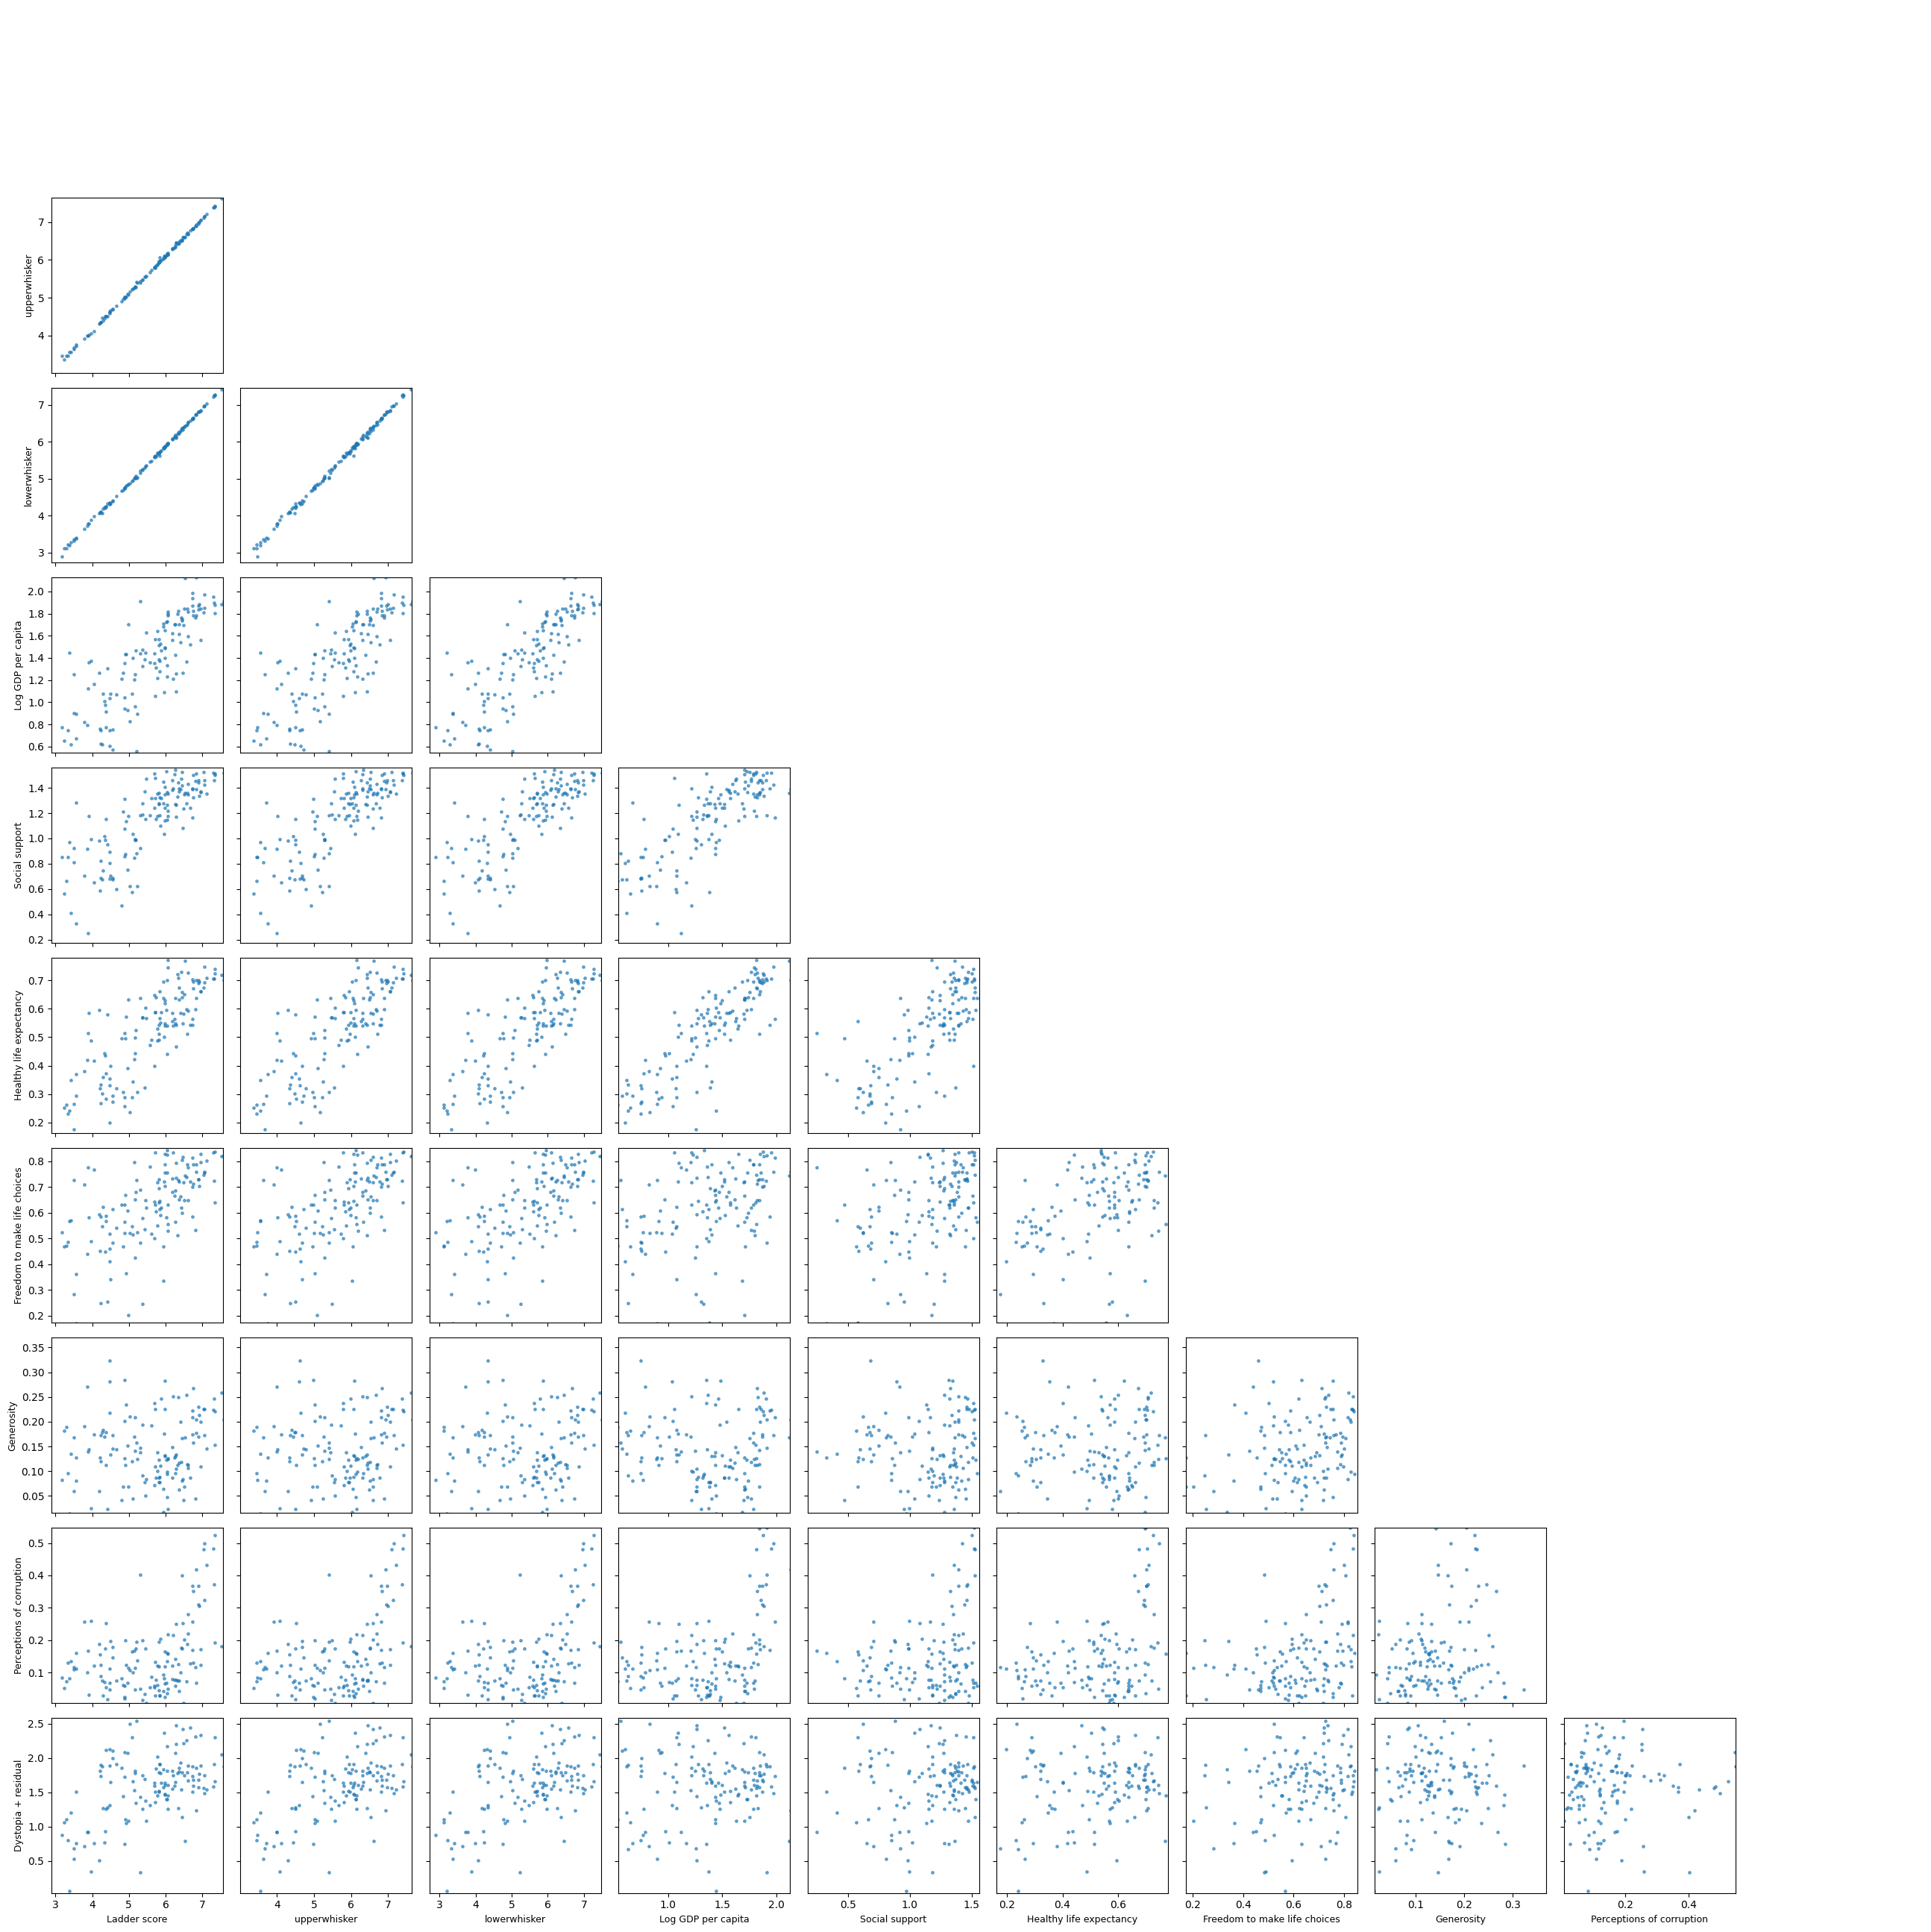

In [62]:
df_use = report


cols = df_use.columns[2:]


df_num = df_use.copy()
for c in cols:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')


valid_cols = []
for c in cols:
    v = df_num[c].to_numpy()
    m = np.isfinite(v)
    if m.sum() >= 2 and np.nanstd(v[m]) > 0:
        valid_cols.append(c)

k = len(valid_cols)


fig, axes = plt.subplots(k, k, figsize=(max(6, 2.6*k), max(6, 2.6*k)))

for i in range(k):
    for j in range(k):
        ax = axes[i, j]
        if i == j or i < j:

            ax.axis("off")
            continue

        x = df_num[valid_cols[j]].to_numpy()
        y = df_num[valid_cols[i]].to_numpy()
        m = np.isfinite(x) & np.isfinite(y)

        if m.sum() > 0:
            xx, yy = x[m], y[m]

            try:
                x1, x99 = np.nanpercentile(xx, [1, 99])
                y1, y99 = np.nanpercentile(yy, [1, 99])
                if np.isfinite(x1) and np.isfinite(x99) and x1 < x99:
                    ax.set_xlim(x1, x99)
                if np.isfinite(y1) and np.isfinite(y99) and y1 < y99:
                    ax.set_ylim(y1, y99)
            except Exception:
                pass

            ax.scatter(xx, yy, s=6, alpha=0.6)


        if i == k-1:
            ax.set_xlabel(valid_cols[j], fontsize=9)
        else:
            ax.set_xticklabels([])
        if j == 0:
            ax.set_ylabel(valid_cols[i], fontsize=9)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.show()


**Figure 1**: This plot shows 45 scatterplots of the 11 numerical ctegories of data in the 2024 World Happiness Report. The scales of the axes of the scatter plots vary, with the ladder score ranging from between 2 and 8 while the Generosity values fall between 0 and 0.35. The scatter plots for the "ladder score, upper whisker of the ladder score, and lower whisker of the ladder score, have a linear shape, which correctly suggests a relationship between the ladder score and the spread of the ladder score. The shapes of the distributions of the other columns with the ladder score, upper whisker, and lower whisker look similar, which is expected as the upper whisker and lower whisker values are shifted by a near-constant value from the ladder scores. Log GDP per Capita, Social Support, and Healthy Life Expectancy have the strongest correlations with the ladder score. Interestingly, Perceptions of Corruption has a positive correlation, especially for ladder scores greater than 6, while not seeming to have much of a correlation at lower values.

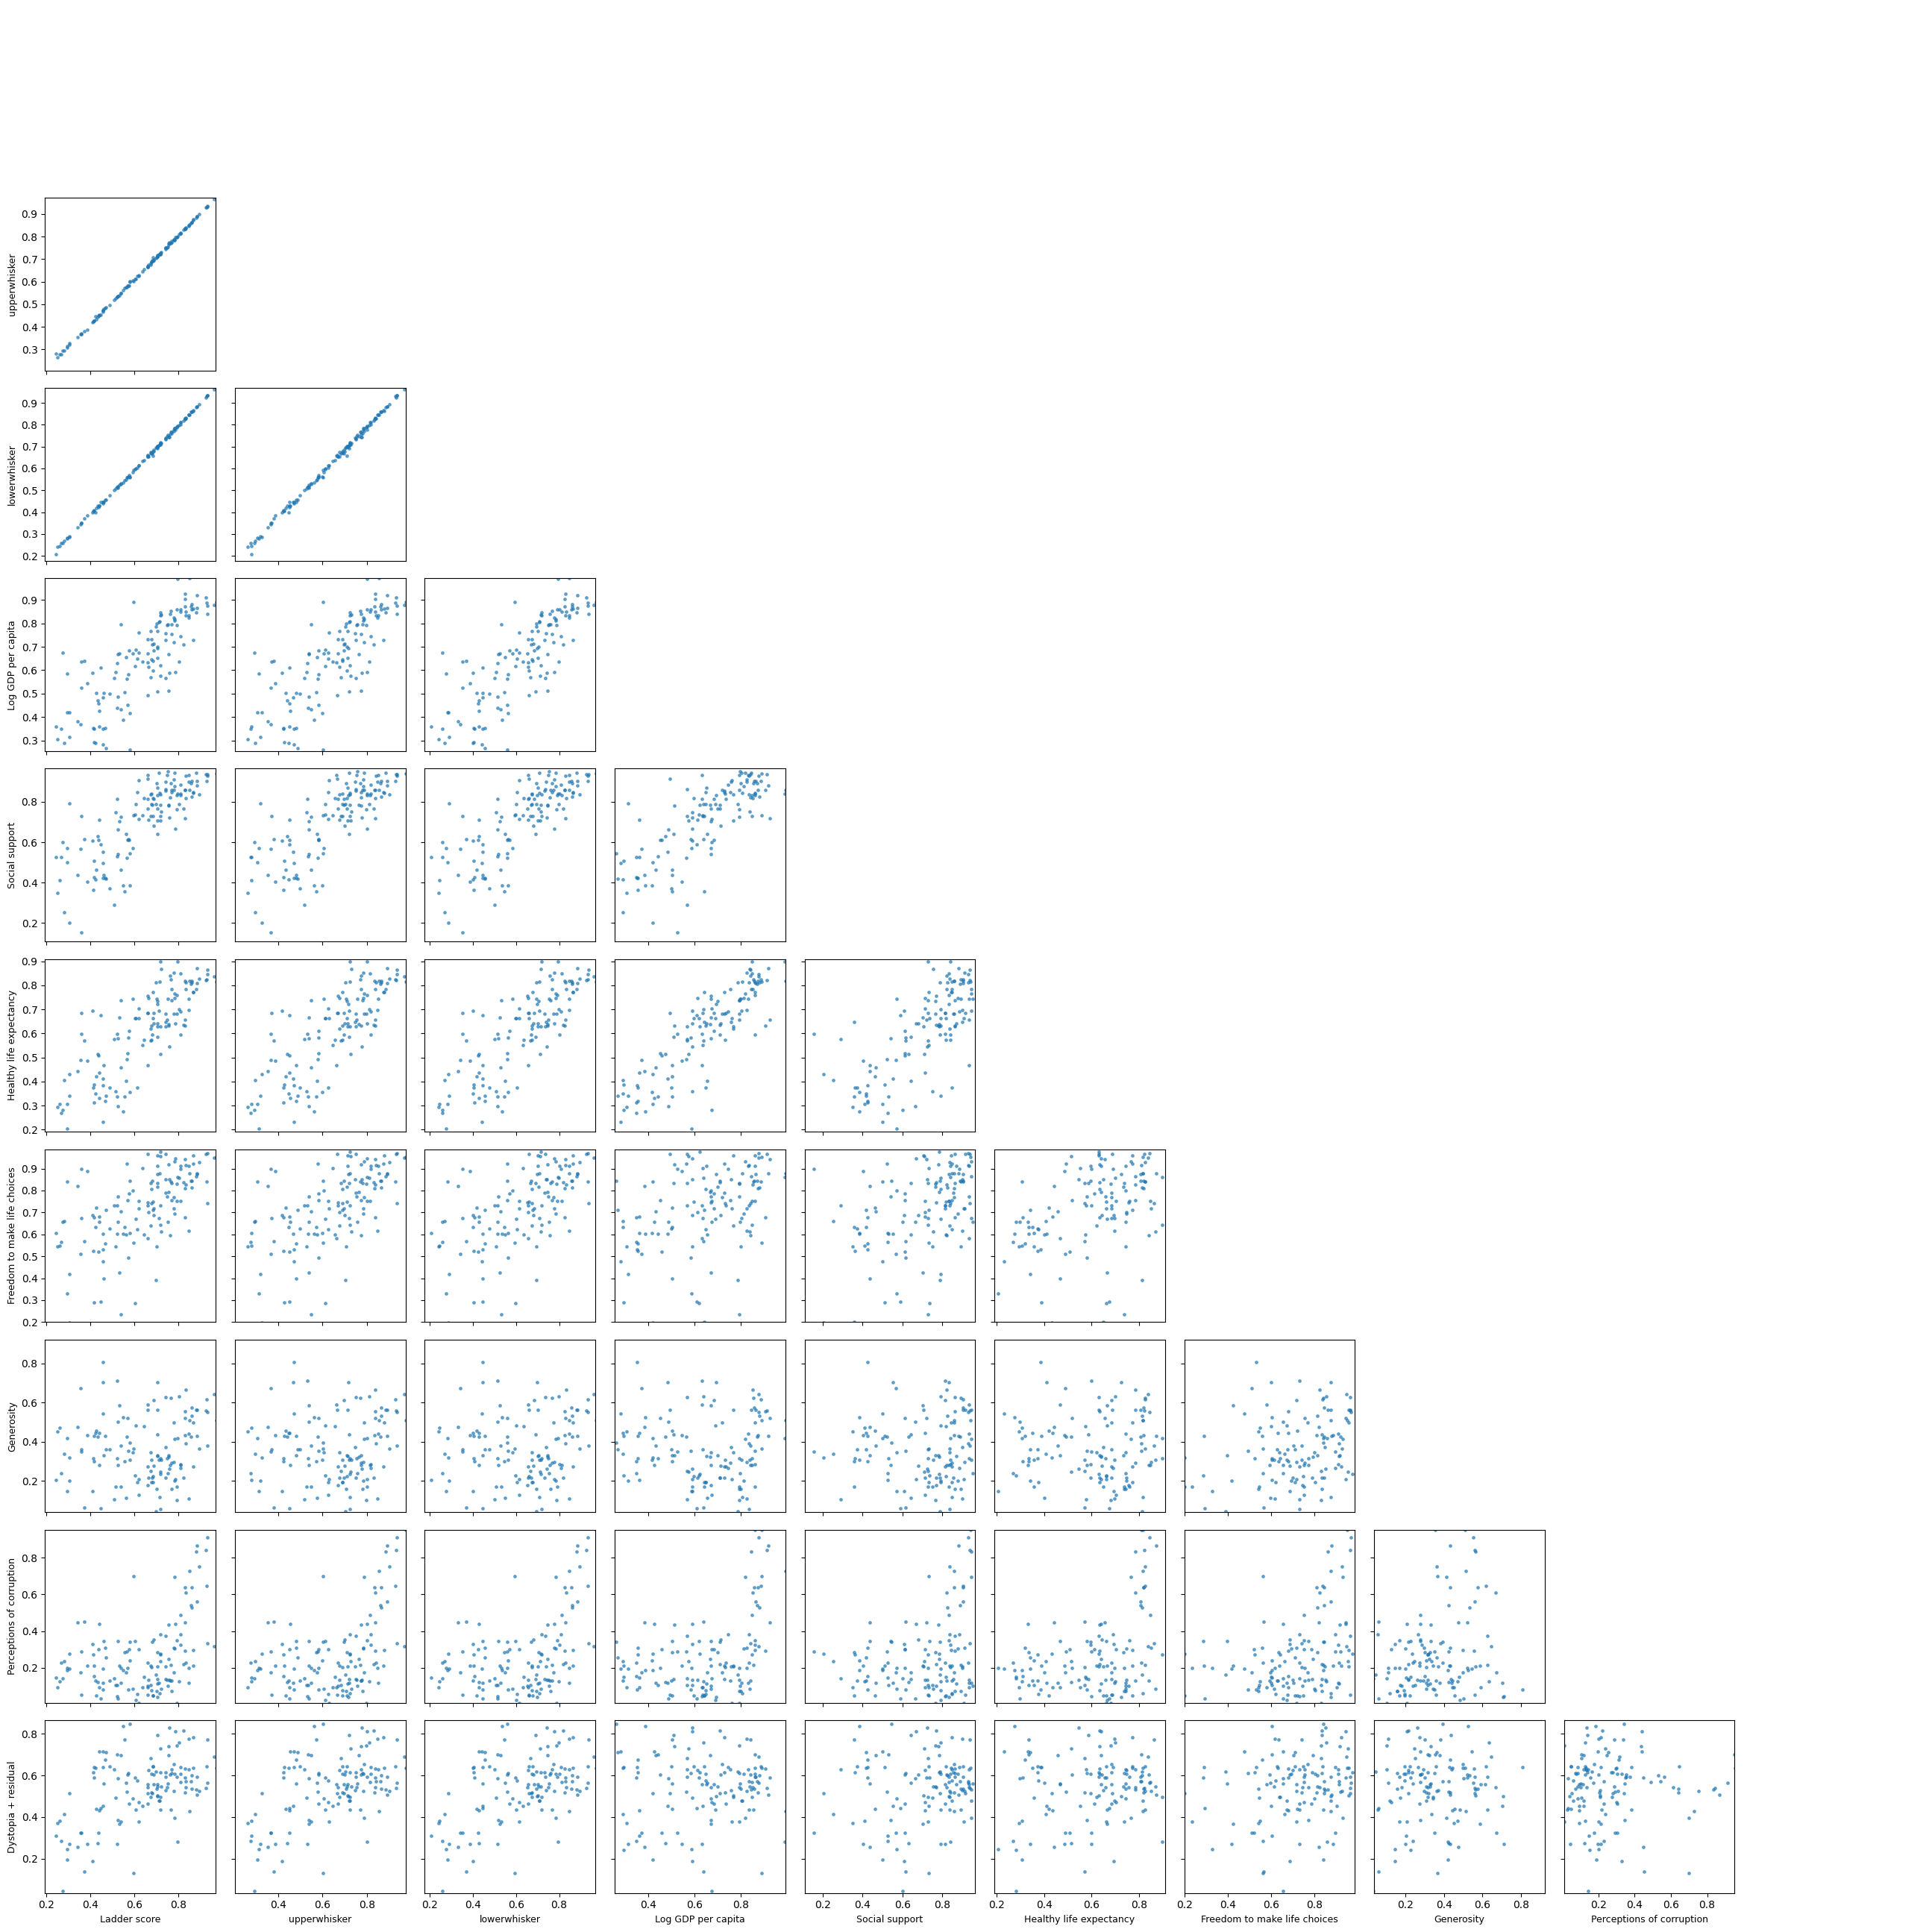

In [63]:
df_use = report_minmax


cols = df_use.columns[2:]


df_num = df_use.copy()
for c in cols:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')


valid_cols = []
for c in cols:
    v = df_num[c].to_numpy()
    m = np.isfinite(v)
    if m.sum() >= 2 and np.nanstd(v[m]) > 0:
        valid_cols.append(c)

k = len(valid_cols)


fig, axes = plt.subplots(k, k, figsize=(max(6, 2.6*k), max(6, 2.6*k)))

for i in range(k):
    for j in range(k):
        ax = axes[i, j]
        if i == j or i < j:

            ax.axis("off")
            continue

        x = df_num[valid_cols[j]].to_numpy()
        y = df_num[valid_cols[i]].to_numpy()
        m = np.isfinite(x) & np.isfinite(y)

        if m.sum() > 0:
            xx, yy = x[m], y[m]

            try:
                x1, x99 = np.nanpercentile(xx, [1, 99])
                y1, y99 = np.nanpercentile(yy, [1, 99])
                if np.isfinite(x1) and np.isfinite(x99) and x1 < x99:
                    ax.set_xlim(x1, x99)
                if np.isfinite(y1) and np.isfinite(y99) and y1 < y99:
                    ax.set_ylim(y1, y99)
            except Exception:
                pass

            ax.scatter(xx, yy, s=6, alpha=0.6)


        if i == k-1:
            ax.set_xlabel(valid_cols[j], fontsize=9)
        else:
            ax.set_xticklabels([])
        if j == 0:
            ax.set_ylabel(valid_cols[i], fontsize=9)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.show()


**Figure 2:** This plot shows 45 scatterplots of the 11 numerical categories of data in the 2024 World Happiness Report, which have been min-max scaled, so the minimum data value has been subtracted from all the values in a data category, and then those values were divided by the range of the data. This puts the scales of the axes of all the scatterplots between 0 and 1, while the shape of the scatter distributions remains the same as for the unscaled data, as can be seen by comparing Figures 1 and 2.

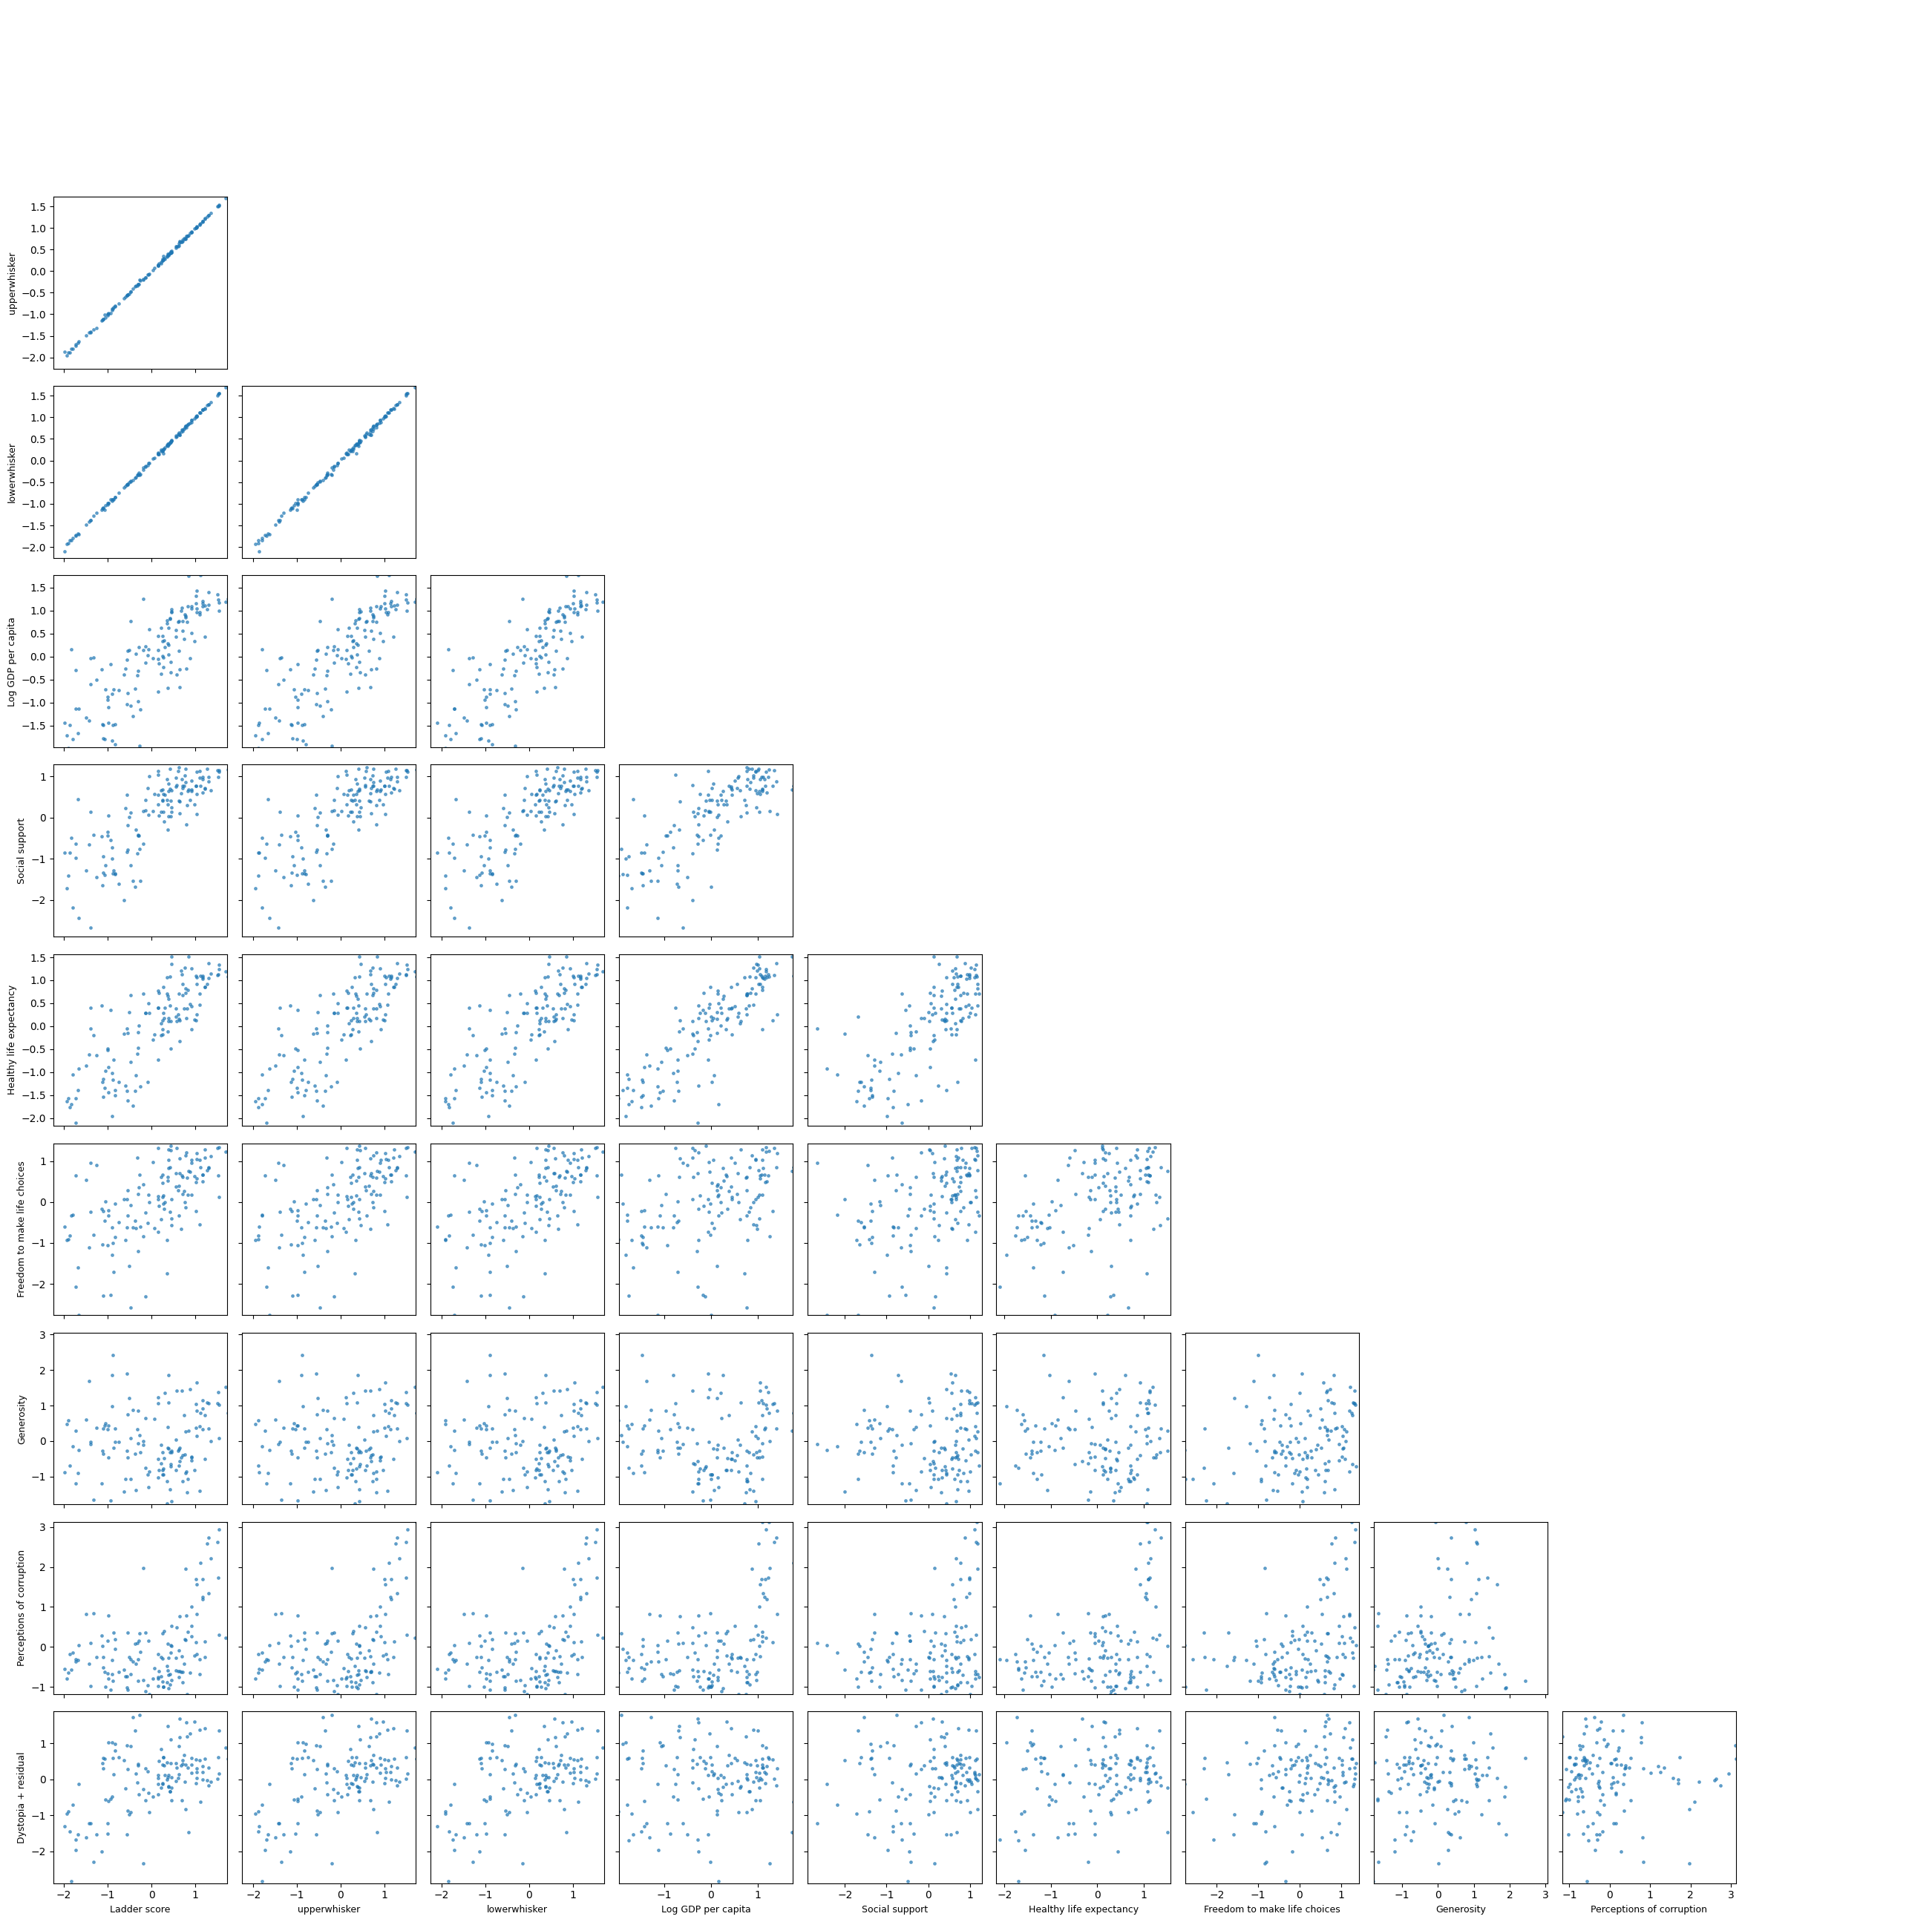

In [64]:
df_use = report_standard


cols = df_use.columns[2:]


df_num = df_use.copy()
for c in cols:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')


valid_cols = []
for c in cols:
    v = df_num[c].to_numpy()
    m = np.isfinite(v)
    if m.sum() >= 2 and np.nanstd(v[m]) > 0:
        valid_cols.append(c)

k = len(valid_cols)


fig, axes = plt.subplots(k, k, figsize=(max(6, 2.6*k), max(6, 2.6*k)))

for i in range(k):
    for j in range(k):
        ax = axes[i, j]
        if i == j or i < j:

            ax.axis("off")
            continue

        x = df_num[valid_cols[j]].to_numpy()
        y = df_num[valid_cols[i]].to_numpy()
        m = np.isfinite(x) & np.isfinite(y)

        if m.sum() > 0:
            xx, yy = x[m], y[m]

            try:
                x1, x99 = np.nanpercentile(xx, [1, 99])
                y1, y99 = np.nanpercentile(yy, [1, 99])
                if np.isfinite(x1) and np.isfinite(x99) and x1 < x99:
                    ax.set_xlim(x1, x99)
                if np.isfinite(y1) and np.isfinite(y99) and y1 < y99:
                    ax.set_ylim(y1, y99)
            except Exception:
                pass

            ax.scatter(xx, yy, s=6, alpha=0.6)


        if i == k-1:
            ax.set_xlabel(valid_cols[j], fontsize=9)
        else:
            ax.set_xticklabels([])
        if j == 0:
            ax.set_ylabel(valid_cols[i], fontsize=9)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.show()


**Figure 3:** This plot shows 45 scatterplots of the 11 numerical categories of data in the 2024 World Happiness Report, which have been standardized, so each data point has had the mean subtracted and then been divided by the standard deviation of the data category. This means values close to the mean of the data are centered around 0, and the ranges of each data category are closer than for the unscaled data. Like for the min-max scaled data, the shape of the scatter distributions remains the same as for the unscaled data, as can be seen by comparing Figure 3 to Figures 1 and 2.

In [65]:
#cluster with kmeans into 3 clusters
km = cluster.KMeans(n_clusters=3, random_state=777) # envoke package cluster
km.get_params() # check params

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'auto',
 'random_state': 777,
 'tol': 0.0001,
 'verbose': 0}

In [66]:
# features used in km fit
km_features = ['Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual']

km.fit(report_standard[km_features]) # fit model

KMeans(n_clusters=3, random_state=777)

Text(0.5, 1.0, 'Clustered Happiness Score')

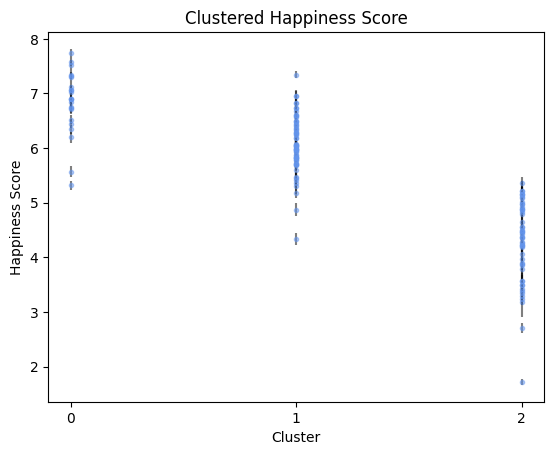

In [67]:

plt.errorbar(km.labels_, report["Ladder score"], yerr = (report["upperwhisker"]- report["lowerwhisker"])/2,
             fmt='.', alpha =.5, ecolor= 'k', color = "cornflowerblue")
plt.xticks(range(3))
plt.ylabel("Happiness Score")
plt.xlabel("Cluster")
plt.title("Clustered Happiness Score")

**Figure 4:** This figure shows the happiness scores (or ladder scores) plotted by their cluster. The cluster was found using KMeans clustering on the standardized numerical data from the 2024 World Happiness Report to group the data into 3 clusters. The error on the happiness score is indicated by the darker blue bars. This plot shows that the data were broken into 3 clusters with one cluster having, on average, higher happiness scores, the next cluster having lower happiness scores compared to the first cluster, and the final cluster having the lowest average happiness score. The range of happiness scores for each cluster does overlap, and each cluster appears to have "outlier" with noticably lower (or in the case of Cluster 1, higher) happiness scores, as the error bars for those points do not overlap with any other point in the cluster.

In [68]:
def plot_intravariance_vs_clusters(df, max_clusters, ax):
  icvs = []
  for i in range(2, max_clusters+1):
    km = cluster.KMeans(n_clusters = i, random_state=777).fit(df)
    icvs.append(km.inertia_)
  ax.plot(range(2,max_clusters+1), icvs)
  ax.set_xlabel("Number of clusters")
  ax.set_ylabel("Intracluster variance")

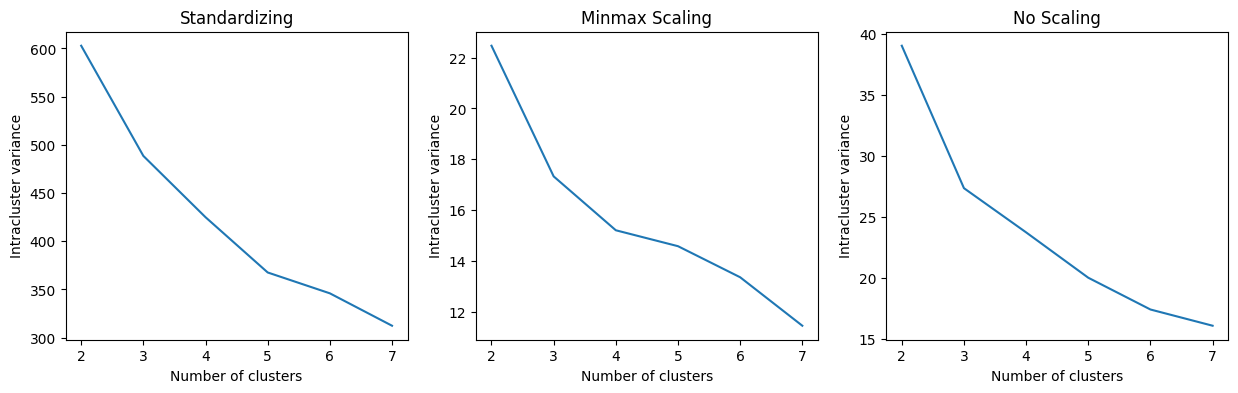

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,4))
plot_intravariance_vs_clusters(report_standard[km_features],7,ax1)
plot_intravariance_vs_clusters(report_minmax[km_features],7,ax2)
plot_intravariance_vs_clusters(report[km_features],7,ax3)
ax1.set_title("Standardizing")
ax2.set_title("Minmax Scaling")
ax3.set_title("No Scaling")
plt.show()

**Figure 5:** This figure shows the intracluster variance of the clusters found using KMeans clustering plotted against the number of clusters for the dataset that was standardize, the data set that was min-max scaled and the original data set that was not scaled. The range of the intracluster variance varies with each dataset, due to scaling of the data. While scaling preserves the shapes of the scatter plots as seen Figures 1, 2, and 3, there is a clear difference in the curve of intracluster variance over the number of clusters for each case. The minmax-scaled data shows an inflection point at 4 clusters, which is not the case for either the standardized data or the unscaled data, which have no inflection point. That means that for minmax scaling, there appears to be a better choice for number of clusters using KMeans clustering, while the plot for the standardized data (as well as the unscaled data) suggests that another type of clustering method might work better for the dataset.